# Hello World!

### **Description**

#### The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

**Objective** : To provide insights into the relationship between the predictor variables and the performance index.

**Variables:**
- *Hours Studied*: The total number of hours spent studying by each student.
- *Previous Scores*: The scores obtained by students in previous tests.
- *Extracurricular Activities*: Whether the student participates in extracurricular activities (Yes or No).
- *Sleep Hours*: The average number of hours of sleep the student had per day.
- *Sample Question Papers Practiced*: The number of sample question papers the student practiced.

**Target Variable:**
- *Performance Index*: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

### Importing Dataset

In [ ]:
!pip install pandas

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Vanshikha\Downloads\Hemisphere Consulting Group\Workshop\August_Python_Workshop\Linear\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


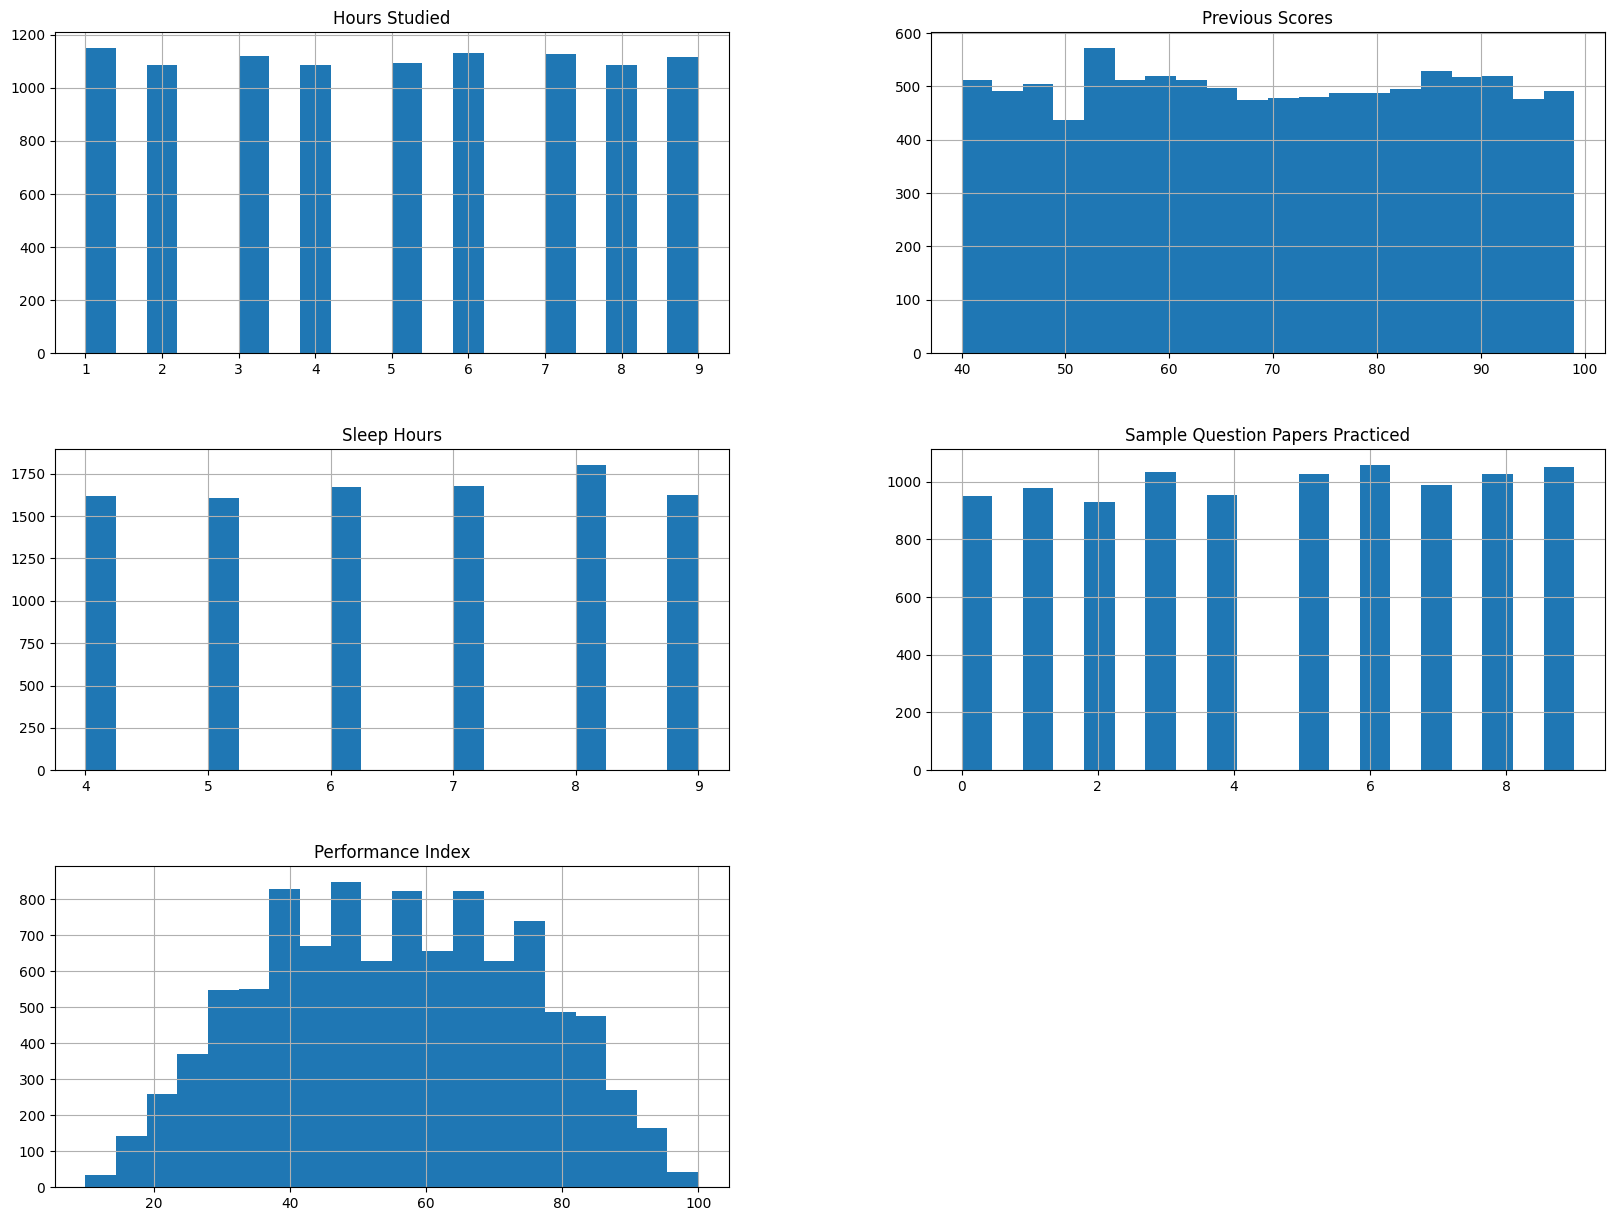

In [5]:
import matplotlib.pyplot as plt
# visualizing the features
df.hist(bins=20, figsize=(20, 15))
plt.show()

After exploring the dataset and examining the distribution of features, I found that the data is almost balanced. Most features are distributed symmetrically with mean values near the center, indicating that the data is well-balanced. The dataset is clean with no missing values, and the features do not require transformation or cleaning. All independent features, except for one, are numeric integers. Based on this analysis, the only necessary preprocessing step is to convert the single categorical column into an integer or boolean format.

In [6]:
# Convert the (Extracurricular Activities) feature into a dummy variable.

In [7]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [9]:
import matplotlib.pyplot as plt

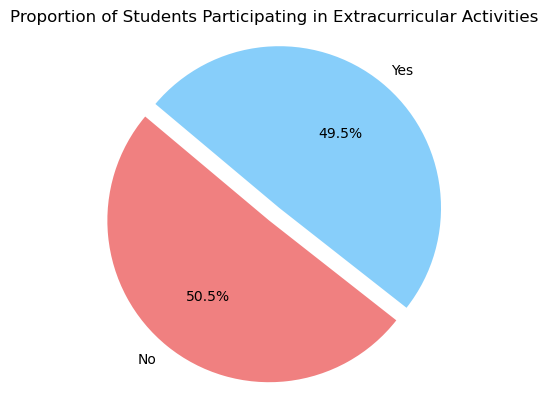

In [11]:
activity_counts = df['Extracurricular Activities'].value_counts()
labels = ['No', 'Yes']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.pie(activity_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Proportion of Students Participating in Extracurricular Activities')
plt.axis('equal')

plt.show()

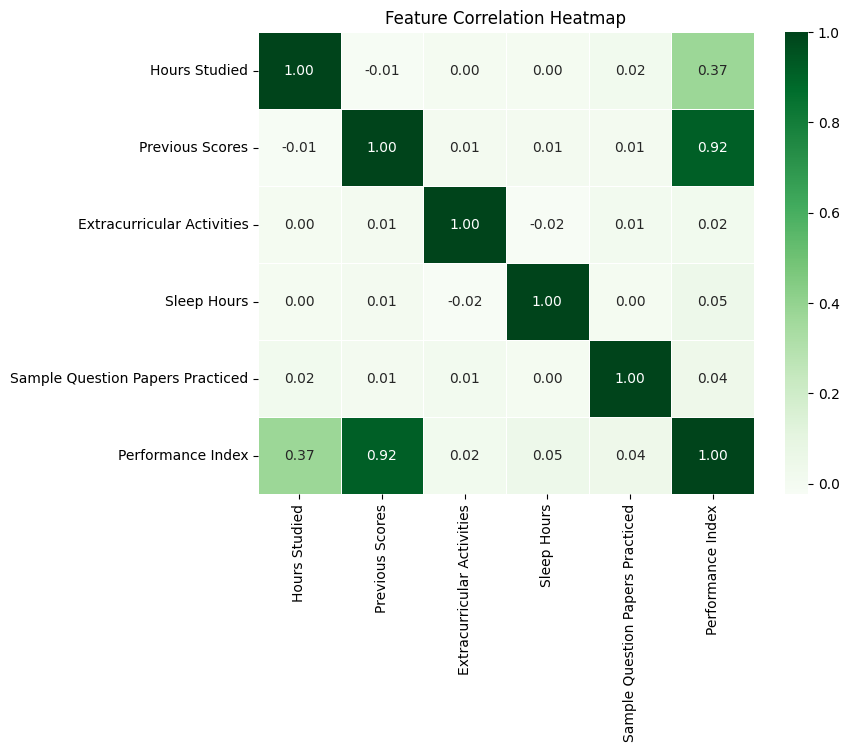

In [10]:
import seaborn as sns # visualization library
corr = df.corr() # defined the corr

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

A strong positive correlation is observed between student performance and previous scores, and a moderate positive correlation is seen with studying hours. However, no significant relationship is found with other features such as extracurricular activities, sleeping hours, and the number of sample question papers practiced.

### Construct and validate the model

In [12]:
# Importing necessary libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = df.drop(columns='Performance Index')
y = df['Performance Index']

reg_model = LinearRegression()

cv_scores = cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_squared_error')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Evaluate the final model on the test set
print(f'Average MSE from 10-fold cross-validation: {-cv_scores.mean():.2f}')
print(f'Test set R^2 score: {reg_model.score(X_test, y_test):.2f}')

Average MSE from 10-fold cross-validation: 4.15
Test set R^2 score: 0.99


Based on the results obtained, the model demonstrates strong performance across evaluations. The average Mean Squared Error (MSE) from 10-fold cross-validation is 4.15, indicating that the average difference between the actual and predicted values is only 4.15 marks, which is good. Additionally, the model achieves an impressive R² score of 0.99 on the test set, highlighting its capability to accurately explain the variance in the target variable.

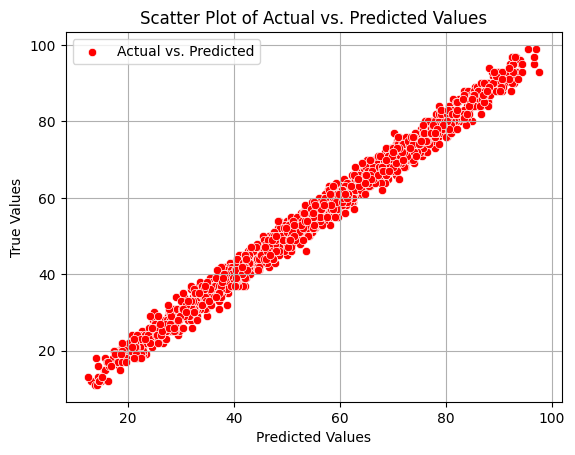

In [15]:
y_predict = reg_model.predict(X_test)

# Assuming y_pred and y_test are your prediction and test target data
sns.scatterplot(x=y_predict, y=y_test, color='red', label='Actual vs. Predicted')

# Adding labels and title
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the plot of predicted and actual values forms an almost straight 45-degree line, indicating that the model's predictions are highly accurate. This close match between predicted and actual values suggests that the model is performing very well with a high level of accuracy.

In [16]:
residuals = y_test - y_predict
print(residuals)

6252   -3.711854
4684   -2.615513
1731   -1.903145
4742   -3.289767
4521   -2.004570
          ...   
6412   -1.886280
8285    3.301975
7853   -0.793420
1095    1.656726
6929    1.057377
Name: Performance Index, Length: 2000, dtype: float64


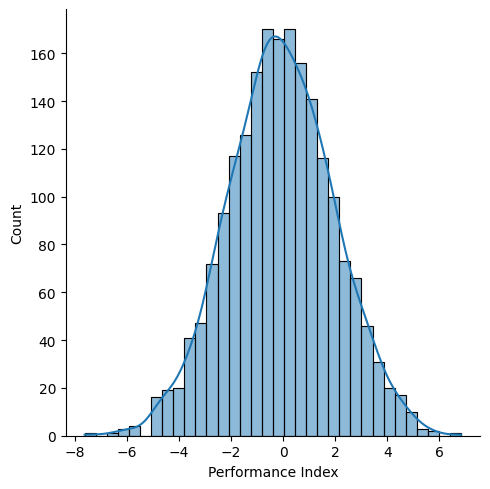

In [17]:
sns.displot(residuals, kde=True)

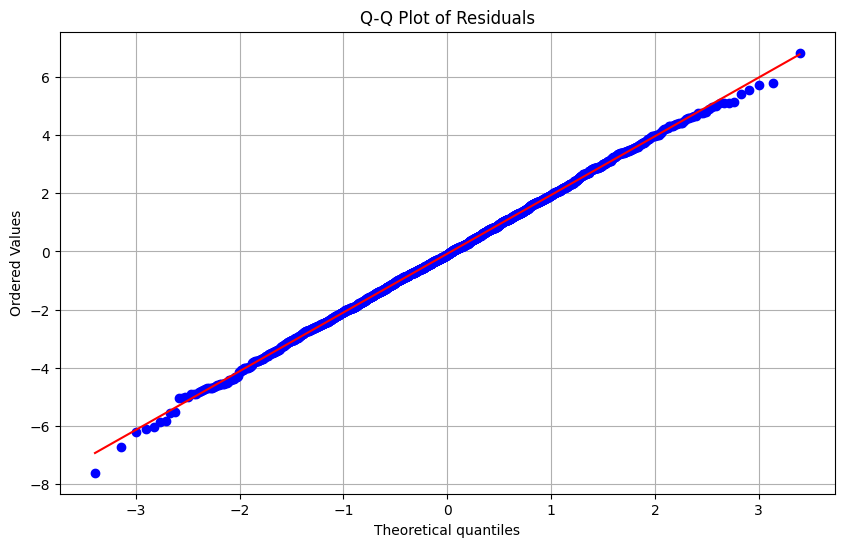

In [19]:
import scipy.stats as sts

plt.figure(figsize=(10, 6))
sts.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

In [20]:
# Perform the Shapiro-Wilk test
stat, p_value = sts.shapiro(residuals)
print(f'Shapiro-Wilk Test statistic: {stat:.2f}')
print(f'p-value: {p_value:.2f}')

Shapiro-Wilk Test statistic: 1.00
p-value: 0.98


As we see, residuals are normaly distributed which means that the model captures the linear relationship between the independent featurs and the target variable accurately. The estimates of the model coefficients are unbiased.

#### Summary:

In this analysis, the dependent variable "Performance" was examined. The residuals were found to follow a normal distribution, supported by a high p-value of 0.98. The model's performance was evaluated using a 10-fold cross-validation, yielding an average Mean Squared Error (MSE) of 4.15, indicating consistent accuracy across various data subsets. Moreover, the model achieved an impressive R² score of 0.99 on the test set, demonstrating its robust capability to explain the variability in "Performance Index". Overall, these findings affirm that the model performs exceptionally well in predicting the dependent variable with high accuracy and reliability.